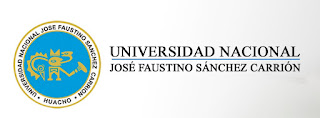

# Curso: Análisis multivariado
# Tema : Sesión 02
# Doc: Victor Guevara

In [2]:
# Importar librerias
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import missingno as mgo

# Conjunto de datos de una empresa financiera sobre morocidad

In [3]:
url="https://raw.githubusercontent.com/VictorGuevaraP/ME-Machine-Learning/master/mora_m.csv"

In [4]:
# Cargar datos
morosidad_df = pd.read_csv(url, sep=";", encoding="latin1")

In [5]:
# Muestra los datos
morosidad_df.head()

,ID,Edad,Experiencia,Ingreso,Postal,Familia,credito,educacion,cuenta de ahorros,servicios online,Mora
0,1550,57.0,31.0,45.0,94305,3,1.40,1,0,1,0
1,4703,35.0,5.0,108.0,90630,2,2.75,3,0,0,0
2,2478,40.0,14.0,179.0,90025,1,2.60,3,1,1,0
3,3109,42.0,15.0,21.0,95678,3,1.00,2,0,1,0
4,2733,33.0,9.0,38.0,93106,1,2.10,3,0,0,0


In [6]:
# Dimensiones
morosidad_df.shape

(4277, 11)

In [7]:
# Tipo de datos
morosidad_df.dtypes

ID                     int64
Edad                 float64
Experiencia          float64
Ingreso              float64
Postal                 int64
Familia                int64
credito              float64
educacion              int64
cuenta de ahorros      int64
servicios online       int64
Mora                   int64
dtype: object

# Coerción: ajustar una variable según el tipo de datos adecuado

In [8]:
# Eliminar columna
morosidad_df = morosidad_df.drop(['ID'], axis=1)

In [9]:
# Convetir según tipo
morosidad_df.Postal = morosidad_df.Postal.astype('object')
morosidad_df.educacion = morosidad_df.educacion.astype('object')
morosidad_df['cuenta de ahorros'] = morosidad_df['cuenta de ahorros'].astype('object')
morosidad_df['servicios online']= morosidad_df['servicios online'].astype('object')
morosidad_df['Mora']= morosidad_df['Mora'].astype('object')

In [10]:
morosidad_df.dtypes

Edad                 float64
Experiencia          float64
Ingreso              float64
Postal                object
Familia                int64
credito              float64
educacion             object
cuenta de ahorros     object
servicios online      object
Mora                  object
dtype: object

In [11]:
# Obtener resumen estadistico
morosidad_df.describe()

,Edad,Experiencia,Ingreso,Familia,credito
count,3972.000000,3933.000000,3889.000000,4277.000000,4277.000000
mean,45.345166,20.141114,74.182566,2.390928,1.938852
std,11.456791,11.484749,46.106611,1.150341,1.745072
min,23.000000,-3.000000,8.000000,1.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000
50%,45.000000,20.000000,64.000000,2.000000,1.500000
75%,55.000000,30.000000,99.000000,3.000000,2.500000
max,67.000000,43.000000,224.000000,4.000000,10.000000


In [12]:
# Obtener resumen estadistico
morosidad_df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Edad,3972.0,NaN,NaN,NaN,45.345166,11.456791,23.0,35.0,45.0,55.0,67.0
Experiencia,3933.0,NaN,NaN,NaN,20.141114,11.484749,-3.0,10.0,20.0,30.0,43.0
Ingreso,3889.0,NaN,NaN,NaN,74.182566,46.106611,8.0,39.0,64.0,99.0,224.0
Postal,4277.0,465.0,94720.0,156.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Familia,4277.0,NaN,NaN,NaN,2.390928,1.150341,1.0,1.0,2.0,3.0,4.0
credito,4277.0,NaN,NaN,NaN,1.938852,1.745072,0.0,0.7,1.5,2.5,10.0
educacion,4277.0,3.0,1.0,1806.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuenta de ahorros,4277.0,2.0,0.0,3856.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
servicios online,4277.0,2.0,1.0,2556.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mora,4277.0,2.0,0.0,3022.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Missing

In [13]:
# Cantidad de cantidad
morosidad_df.isnull().sum()

Edad                 305
Experiencia          344
Ingreso              388
Postal                 0
Familia                0
credito                0
educacion              0
cuenta de ahorros      0
servicios online       0
Mora                   0
dtype: int64

In [14]:
# Cantidad de cantidad
morosidad_df.isnull().sum()/morosidad_df.shape[0]*100

Edad                 7.131167
Experiencia          8.043021
Ingreso              9.071779
Postal               0.000000
Familia              0.000000
credito              0.000000
educacion            0.000000
cuenta de ahorros    0.000000
servicios online     0.000000
Mora                 0.000000
dtype: float64

 # Verificar la aleatoriedad de lo missing

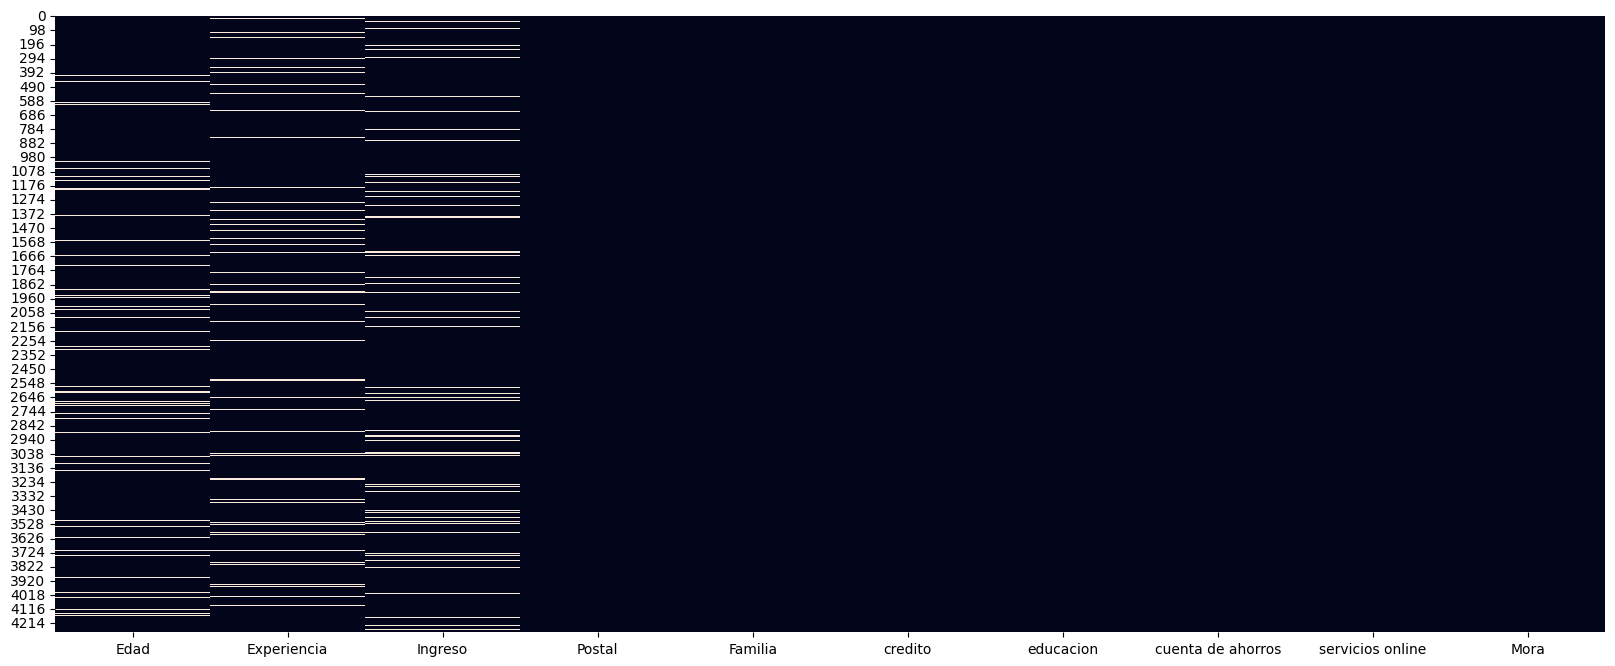

In [15]:
plt.figure(figsize=(20,8))
sns.heatmap(morosidad_df.isnull(), cbar=False)
plt.show()

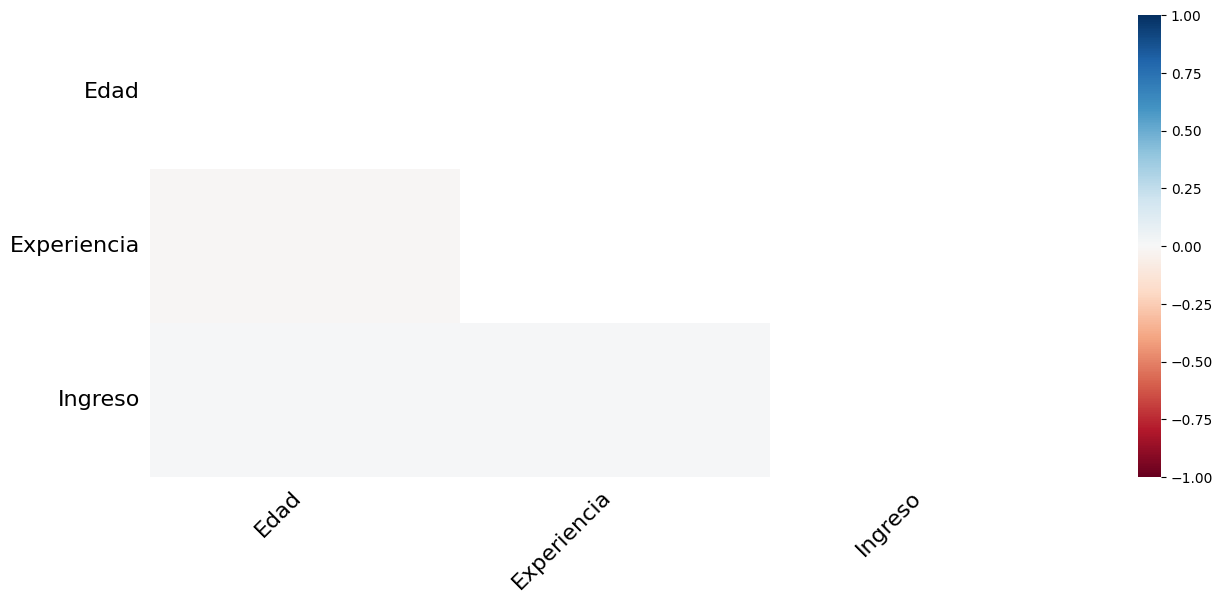

In [16]:
# Evaluar relación entre valores ausentes
mgo.heatmap(morosidad_df, figsize=(15,6))
plt.show()

## Corrección de missing

> Eliminar filas
> Eliminar columnas (15%)

> Imputar: La media, la mediana o la moda
> Imputar: Utilizando técnicas avanzadas

In [17]:
# Imputación valor constante
morosidad_df["Edad_1"] = morosidad_df.Edad.fillna(99)

In [18]:
# Imputación valor - medida estadística
morosidad_df["Edad_2"] = morosidad_df.Edad.fillna(morosidad_df.Edad.mean())

In [19]:
# Imputación valor - medida estadística
morosidad_df["Edad_3"] = morosidad_df.Edad.fillna(morosidad_df.Edad.median())

In [20]:
# Imputación valor - Secuencia de valores
morosidad_df["Edad_4"] = morosidad_df.Edad.fillna(method="backfill")

In [21]:
# Descriptivos
morosidad_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Edad,3972.0,45.345166,11.456791,23.0,35.0,45.000000,55.0,67.0
Experiencia,3933.0,20.141114,11.484749,-3.0,10.0,20.000000,30.0,43.0
Ingreso,3889.0,74.182566,46.106611,8.0,39.0,64.000000,99.0,224.0
Familia,4277.0,2.390928,1.150341,1.0,1.0,2.000000,3.0,4.0
credito,4277.0,1.938852,1.745072,0.0,0.7,1.500000,2.5,10.0
Edad_1,4277.0,49.171382,17.680364,23.0,36.0,47.000000,57.0,99.0
Edad_2,4277.0,45.345166,11.040636,23.0,36.0,45.345166,54.0,67.0
Edad_3,4277.0,45.320552,11.040993,23.0,36.0,45.000000,54.0,67.0
Edad_4,4277.0,45.348609,11.439466,23.0,35.0,46.000000,55.0,67.0


In [22]:
# Comparando resultado mediante gráfica
from scipy.stats import kurtosis, skew

In [23]:
for variable in ['Edad', 'Edad_1', 'Edad_2', 'Edad_3', 'Edad_4']:
  print(morosidad_df[variable].name,)
  print("Coef. de asimetría",skew(morosidad_df[variable].dropna()))
  print("Coef. de curtosis",kurtosis(morosidad_df[variable].dropna()))

Edad
Coef. de asimetría -0.03193577174138482
Coef. de curtosis -1.1533249346013812
Edad_1
Coef. de asimetría 1.3262121838332133
Coef. de curtosis 1.9220450615341127
Edad_2
Coef. de asimetría -0.033139230573013344
Coef. de curtosis -1.011523349770923
Edad_3
Coef. de asimetría -0.026449312097091175
Coef. de curtosis -1.012046456296613
Edad_4
Coef. de asimetría -0.03798074048197341
Coef. de curtosis -1.1458767596678738


In [24]:
# Eliminar las columnas no adecuadas
morosidad_df=morosidad_df.drop(['Edad', 'Edad_1', 'Edad_2', 'Edad_3'], axis=1)

In [26]:
morosidad_df.head()

,Experiencia,Ingreso,Postal,Familia,credito,educacion,cuenta de ahorros,servicios online,Mora,Edad_4
0,31.0,45.0,94305,3,1.40,1,0,1,0,57.0
1,5.0,108.0,90630,2,2.75,3,0,0,0,35.0
2,14.0,179.0,90025,1,2.60,3,1,1,0,40.0
3,15.0,21.0,95678,3,1.00,2,0,1,0,42.0
4,9.0,38.0,93106,1,2.10,3,0,0,0,33.0


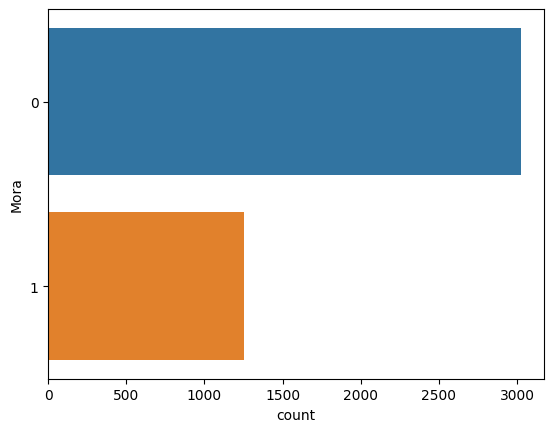

In [30]:
# Gráfico de  barras
sns.countplot(y="Mora", data=morosidad_df)
plt.show()

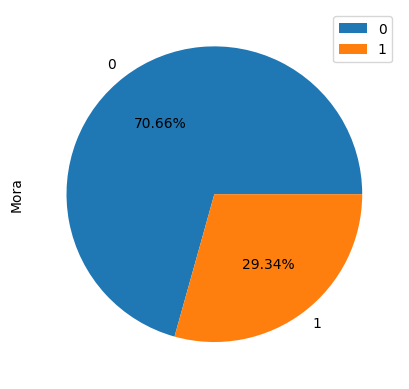

In [39]:
# Gráfico circular
morosidad_df.Mora.value_counts().plot(kind="pie", autopct='%1.2f%%')
plt.legend(labels=morosidad_df.Mora.value_counts().index)
plt.show()

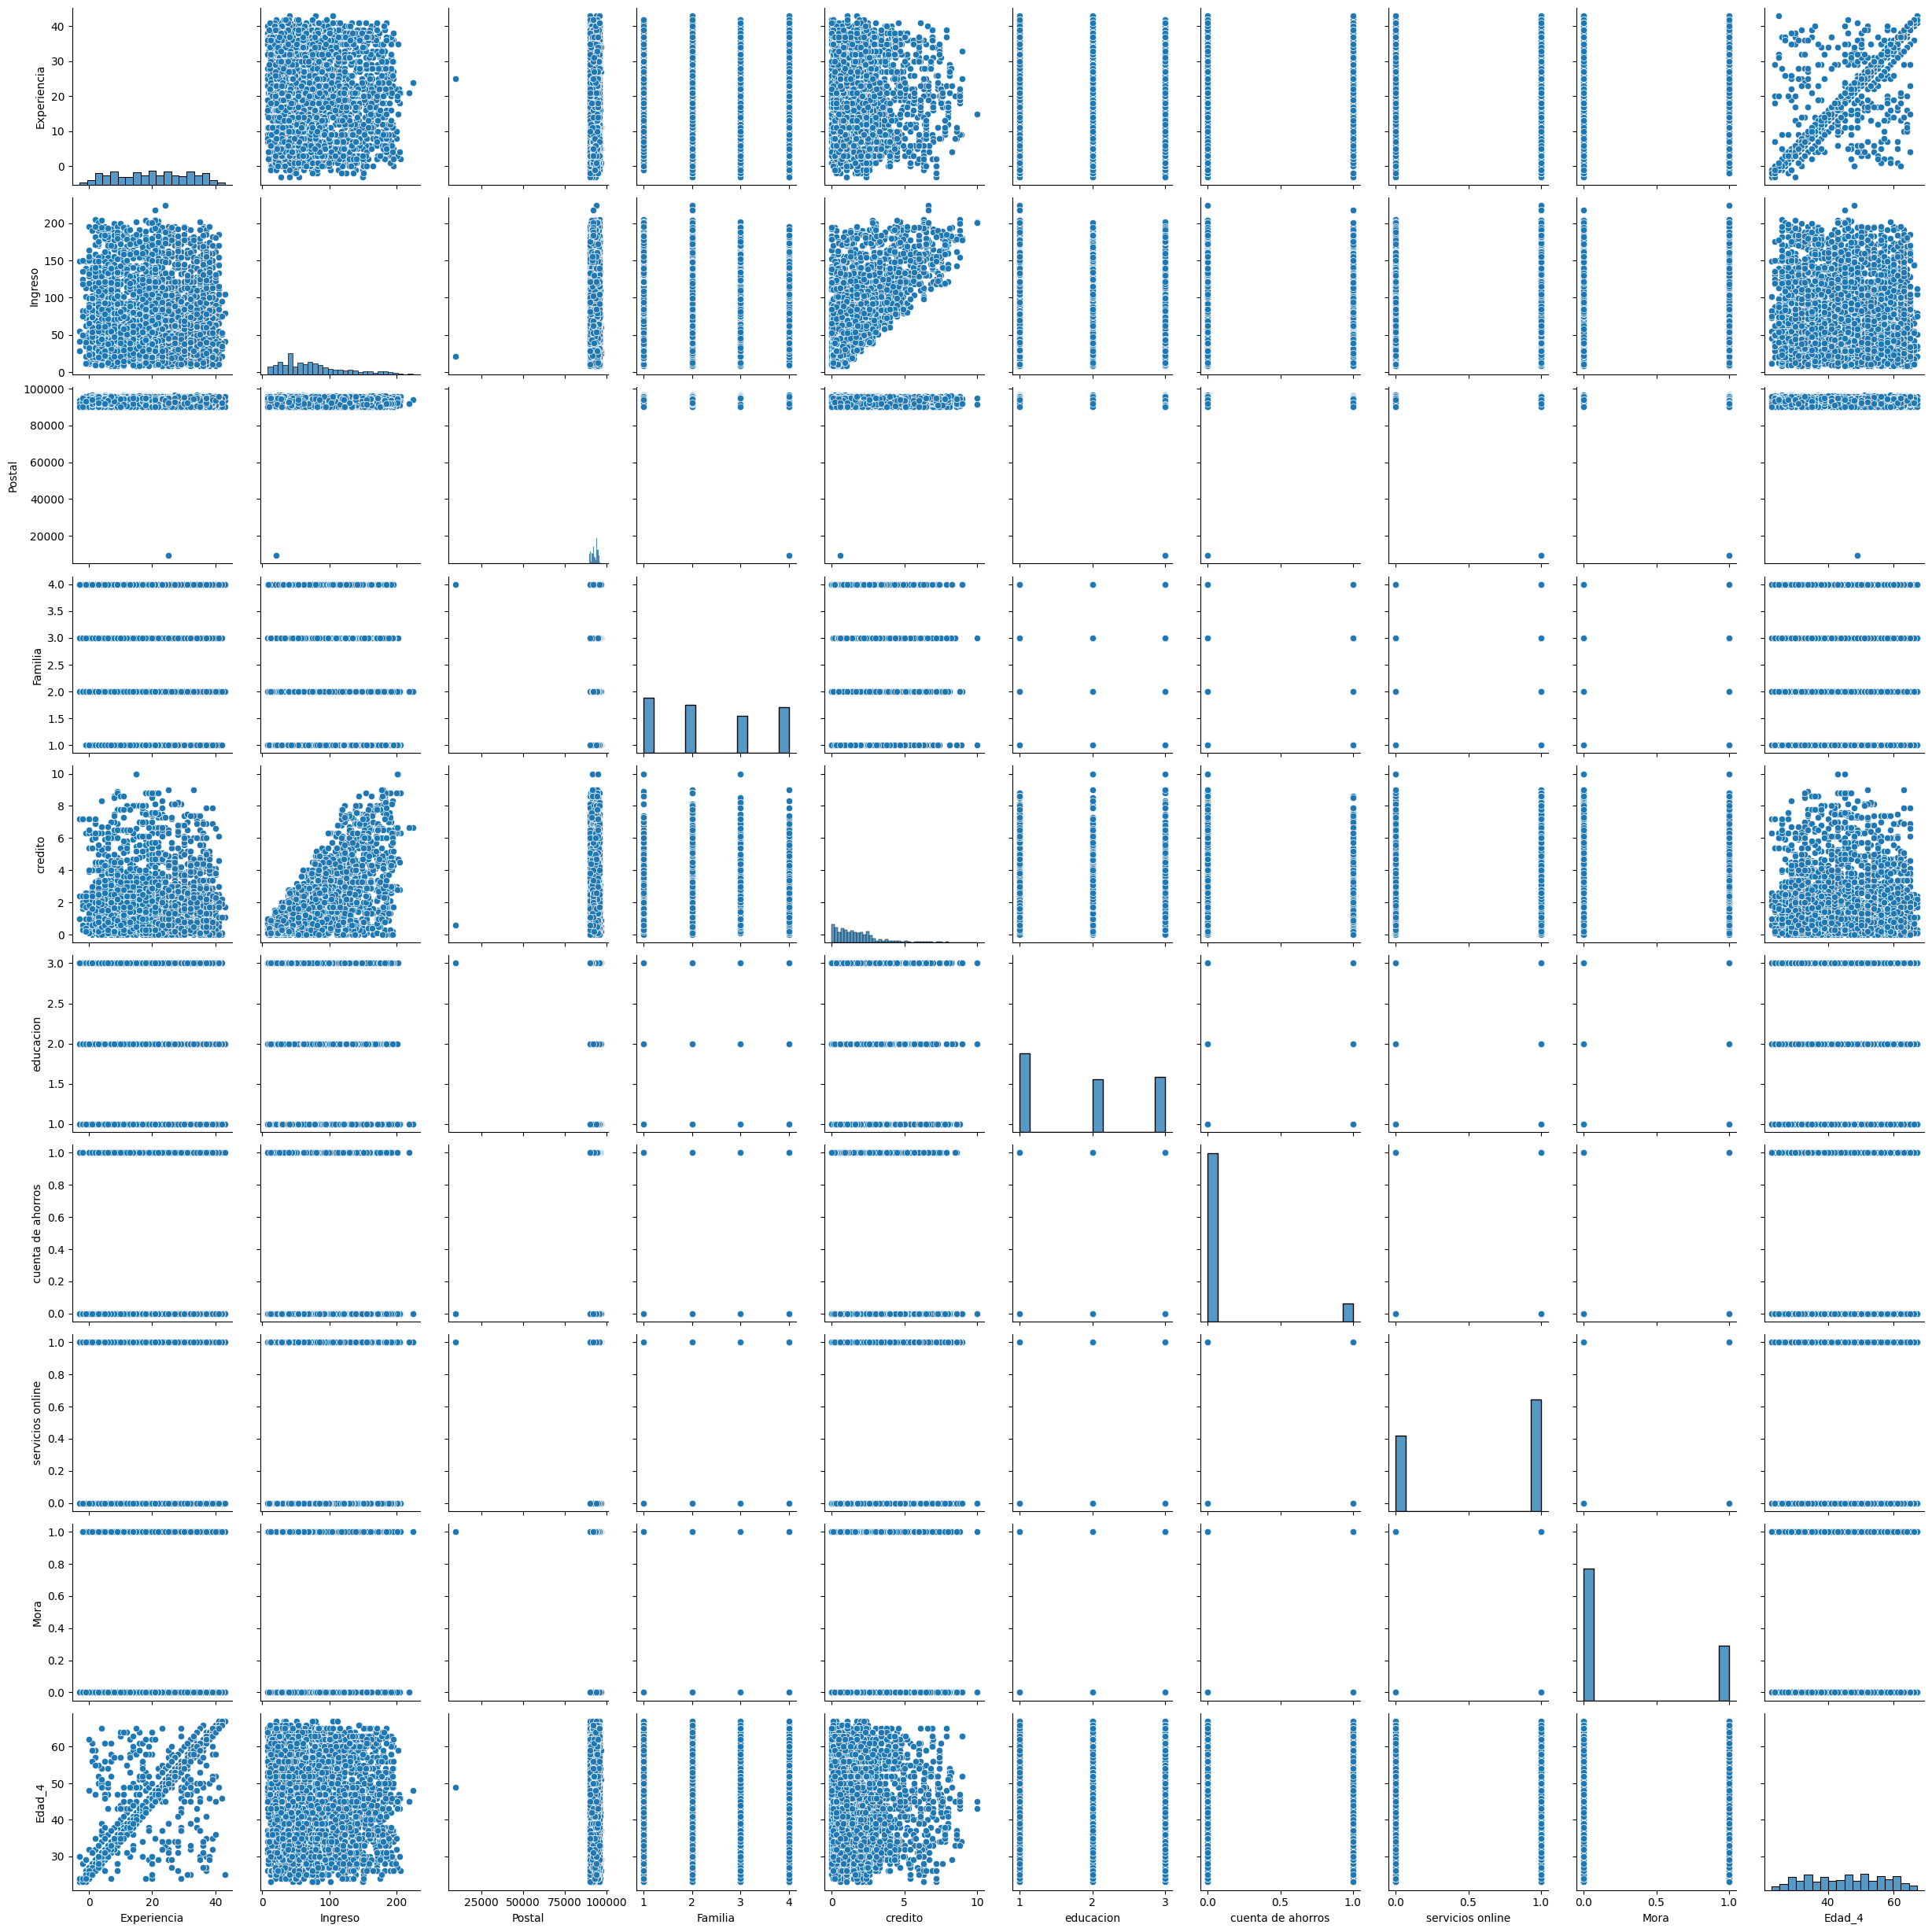

In [40]:
sns.pairplot(morosidad_df)
plt.show()

In [43]:
sns.pairplot(morosidad_df, hue=morosidad_df.Mora)
plt.show()

ValueError: ignored

##
BUSCAR UN CONJUNTO DE DATOS DE FUENTES ABIERTAS (KAGGLE, UCI ML, INEI, BM, OPENDATASETS, ETC..)

> REALIZAR UN BREVE RESUMEN DEL CASO
> REALIZAR UN ANÁLISIS UNIVARIADO Y MULTIVARIADO (ANALIZAR MISSING, ...)

1RA REVISIÓN: 29/09/23